## Importing Libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

## Importing Dataset

In [3]:
dataset = pd.read_csv("../Diabetes/diabetes.csv")

In [4]:
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## Checking Null values

In [5]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [48]:
dataset.describe().T


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [57]:
type = dataset['Outcome'].value_counts()
type

0    500
1    268
Name: Outcome, dtype: int64

## Visualizing the pecentage of people healthy and afffected with diabetes using Plotly

In [63]:
labels = ['Diabetes','Healthy']
Diabetes = type[1]
Healthy = type[0]
values = [Diabetes,Healthy]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

In [64]:
dataset_copy = dataset.copy(deep = True)
dataset_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']] = dataset_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']].replace(0,np.NaN)

## Finding data with value zero and replacing it with median

In [10]:
dataset_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [22]:
dataset_copy = dataset_copy.fillna(dataset_copy.median())

### Visualizing all the columns in the form of bar plot using seaborn

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

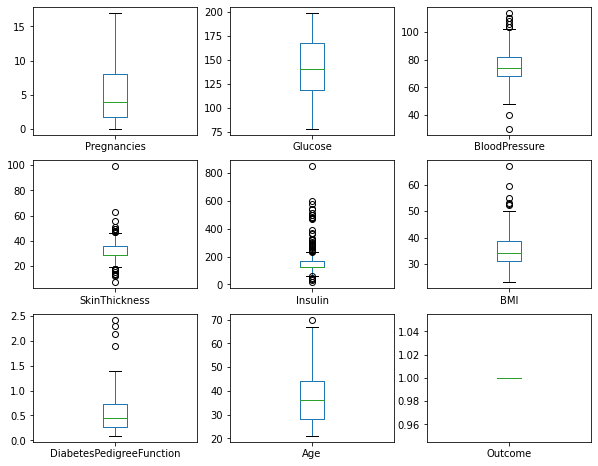

In [49]:
dataset_copy[dataset_copy['Outcome']==1].plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

### Visualizing all the columns in the form of histogram by replacing all the null values with median

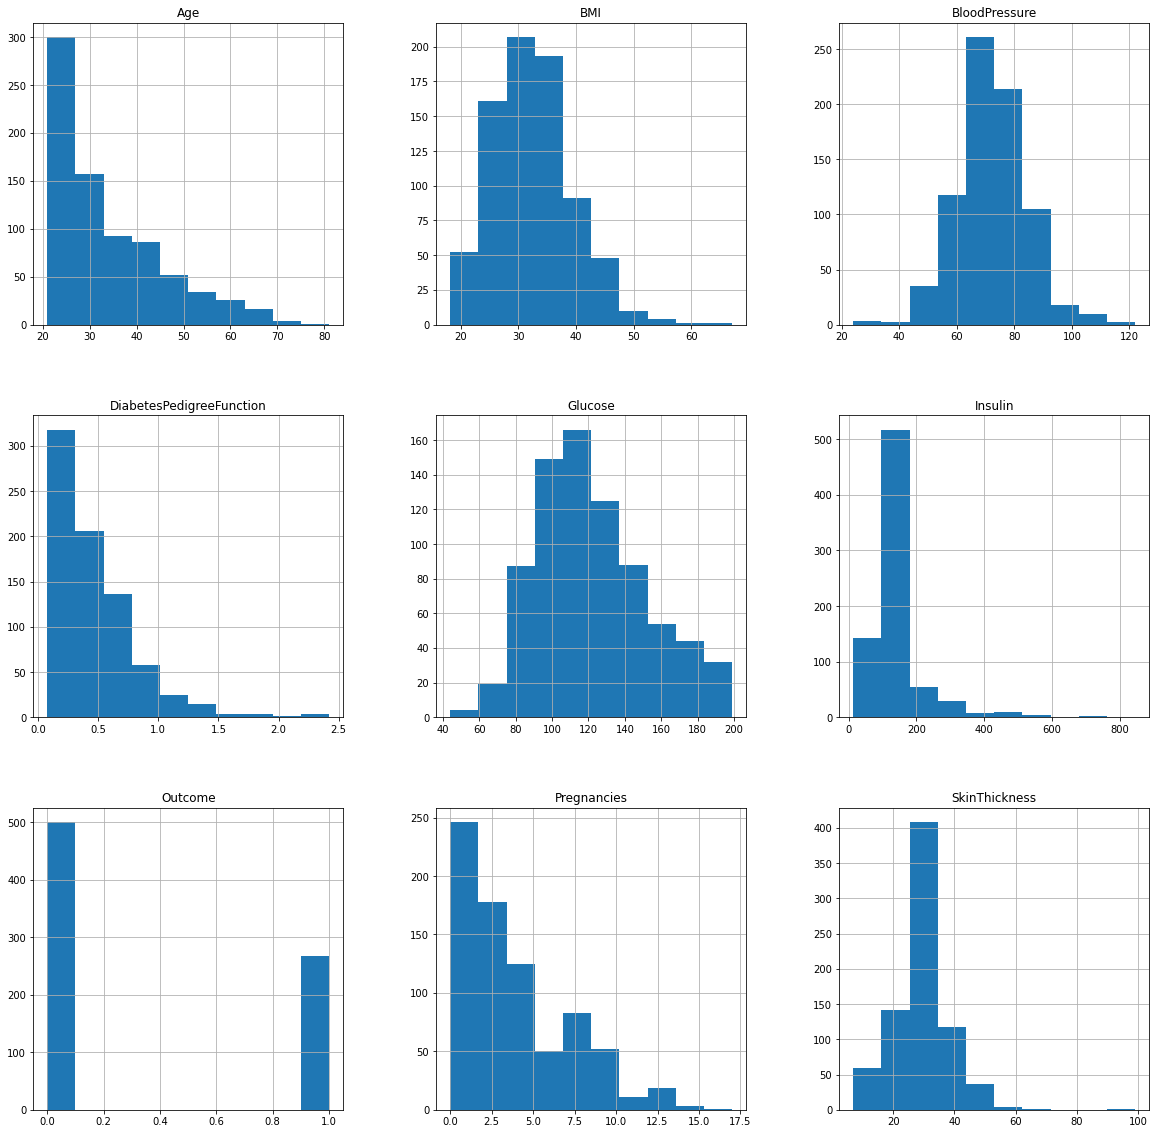

In [50]:
diabetes_hist = dataset_copy.hist(figsize = (20,20))


### Comparing all the columns with the final outcome using seaborn barplot

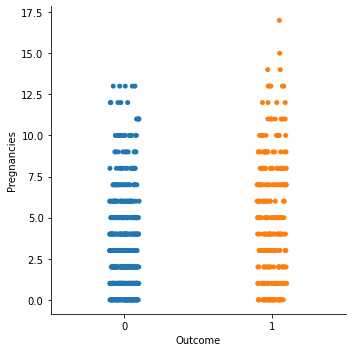

In [82]:
ax = sns.catplot(x="Outcome", y="Pregnancies", data=dataset_copy)

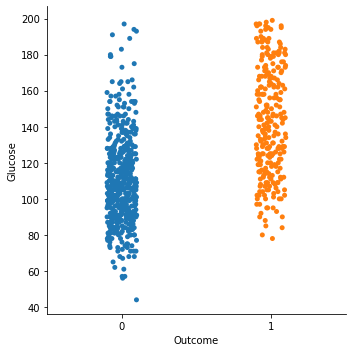

In [72]:
ax = sns.catplot(x="Outcome", y="Glucose", data=dataset_copy)

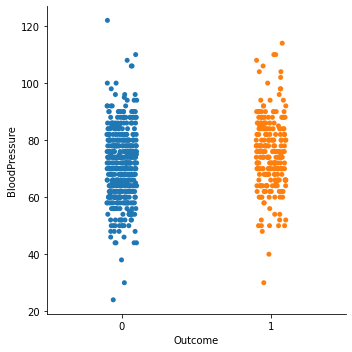

In [73]:
ax = sns.catplot(x="Outcome", y="BloodPressure", data=dataset_copy)

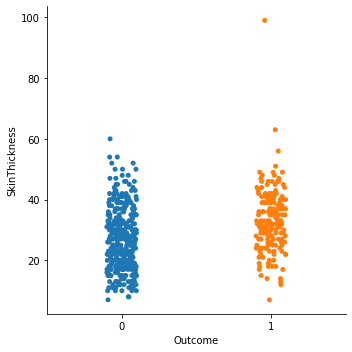

In [74]:
ax = sns.catplot(x="Outcome", y="SkinThickness", data=dataset_copy)

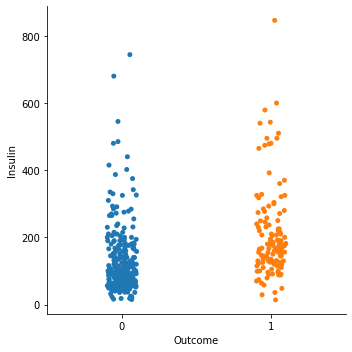

In [75]:
ax = sns.catplot(x="Outcome", y="Insulin", data=dataset_copy)

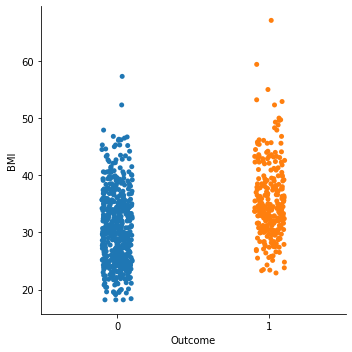

In [76]:
ax = sns.catplot(x="Outcome", y="BMI", data=dataset_copy)

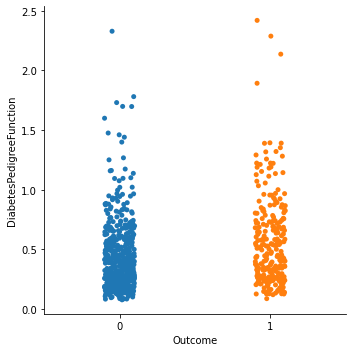

In [77]:
ax = sns.catplot(x="Outcome", y="DiabetesPedigreeFunction", data=dataset_copy)

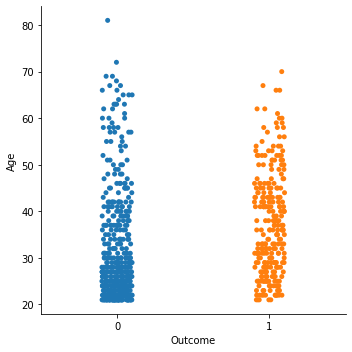

In [78]:
ax = sns.catplot(x="Outcome", y="Age", data=dataset_copy)

### Heatmap for the diabetes dataset

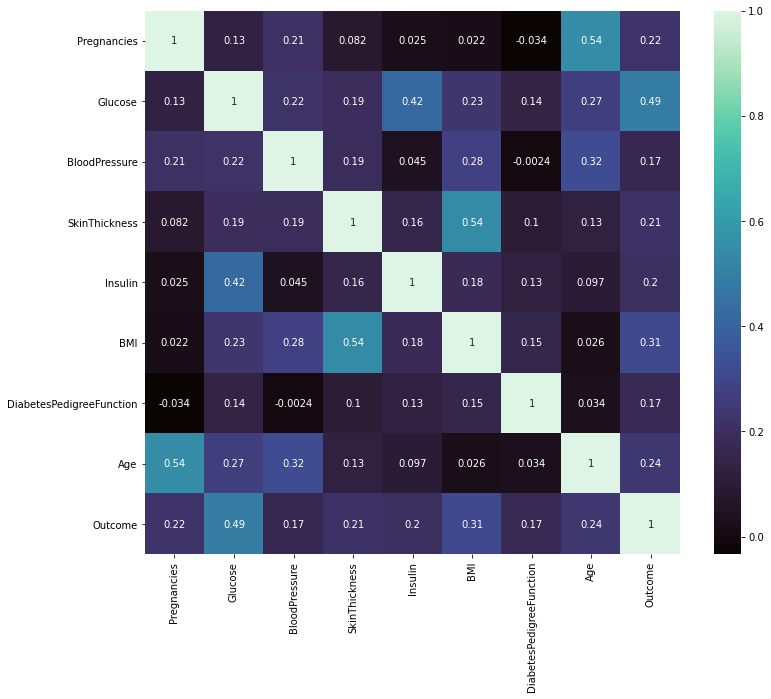

In [60]:
plt.figure(figsize=(12,10)) 
p=sns.heatmap(dataset_copy.corr(), annot=True,cmap ='mako')

In [31]:
x = dataset_copy.iloc[0:,:8]
y = dataset_copy['Outcome']

In [32]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [33]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### Standardization of the dataset

In [34]:
sl = StandardScaler()
x = sl.fit_transform(x)

### Seprating the dataset as train and split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


### Performing Logistic Regression, NB, Random Forest, SVC algorithms 

In [38]:
log = LogisticRegression()
log.fit(x_train, y_train)
log_predict = log.predict(x_test)

In [39]:
log_conf_matrix = confusion_matrix(y_test, log_predict)
log_acc_score = accuracy_score(y_test, log_predict)
print(log_conf_matrix)
print(log_acc_score*100)

[[93 15]
 [20 26]]
77.27272727272727


In [40]:
gas = GaussianNB()
gas.fit(x_train,y_train)
gas_predict=gas.predict(x_test)


In [41]:
gas_conf_matrix = confusion_matrix(y_test, gas_predict)
gas_acc_score = accuracy_score(y_test, gas_predict)
print(gas_conf_matrix)
print(gas_acc_score*100)

[[86 22]
 [15 31]]
75.97402597402598


In [42]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)

In [43]:
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[97 11]
 [19 27]]
80.51948051948052


In [44]:
lin_svc = SVC()
lin_svc.fit(x_train, y_train)
lin_svc=rf.predict(x_test)

In [45]:
lin_svc_conf_matrix = confusion_matrix(y_test, rf_predict)
lin_svc_acc_score = accuracy_score(y_test, rf_predict)
print(lin_svc_conf_matrix)
print(lin_svc_acc_score*100)

[[97 11]
 [19 27]]
80.51948051948052


#### Random forest classifier and SVC provided higher accuracy of about 80.5%